<a id="toc"></a>

### <p style="background-color:#0D8D99; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Data Visualization with Python Lab 1<br><br>23 Dec 2022</p>

![image.png](https://i.ibb.co/4gc0nbk/matplotlib.png)

Matplotlib was created by **John D. Hunter,** an American neurobiologist, and was first released in 2002. Since then it has an **active development community** and is distributed under a **BSD-style license.** Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy [Source](https://en.wikipedia.org/wiki/Matplotlib). Matplotlib is a **low level graph plotting library in python** that serves as a visualization utility. Matplotlib is **open source** and we can use it freely. Matplotlib is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility [Source](https://www.w3schools.com/python/matplotlib_intro.asp).

Matplotlib is a **two-dimensional (2D) plotting library** for Python. With Matplotlib, you can generate lines, scatter graphs, bar charts, histograms, error bars, etc, and even do simple 3D plots using the mplot3d toolkit. Matplotlib has a module called Pyplot, which provides an interface similar to MatLab. [Photo Credit: fullstackpython](https://www.fullstackpython.com/matplotlib.html)

[MATPLOTLIB Source01](https://matplotlib.org/),
[MATPLOTLIB Source02](https://www.educative.io/edpresso/what-is-matplotlib),
[MATPLOTLIB Source03](https://realpython.com/python-matplotlib-guide/),
[MATPLOTLIB Source04](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html), &
[MATPLOTLIB Source05](https://medium.com/@developit19/matplotlib-python-651fd07e9234)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Importing Libraries</p>

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from collections import Counter
import warnings
warnings.filterwarnings('ignore')

###  % --> ipython magic commands
[SOURCE1](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
[SOURCE2](https://www.tutorialspoint.com/jupyter/ipython_magic_commands.htm)
[SOURCE3](https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html)

In [ ]:
%env

In [4]:
%matplotlib -l  # list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


**"%matplotlib inline"** komutu ile ürettiğimiz matplotlib grafiklerini defterin içine gömülü hale gertirebiliyoruz. Böylece notebookumuzdan tam bir belge oluşturabiliyoruz.

<IPython.core.display.Javascript object>


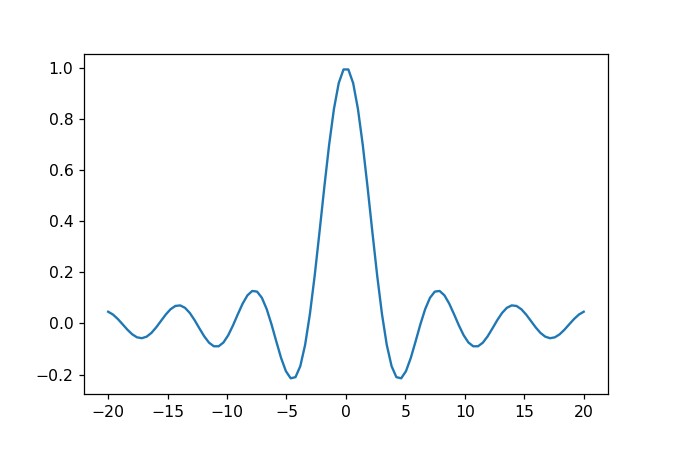

In [3]:
%matplotlib notebook

x = np.linspace(-20,20,100)
y = np.sin(x)/x
plt.plot(x,y);

**NOT: "pylab" sub-modülü ile linspace, sin gibi numpy fonksiyonlarını matplotlib kütüphanesi ile kullanabilirsiniz:**

<IPython.core.display.Javascript object>


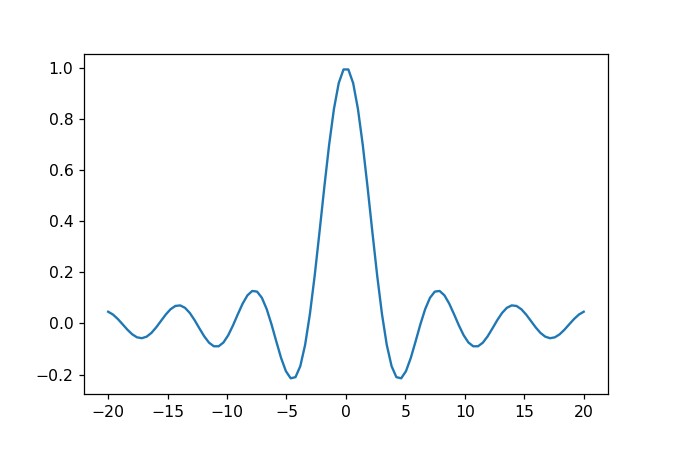

In [4]:
%matplotlib notebook

import matplotlib.pylab as pyl 
x = pyl.linspace(-20,20,100)  
y = pyl.sin(x)/x     
pyl.plot(x,y)
pyl.show()

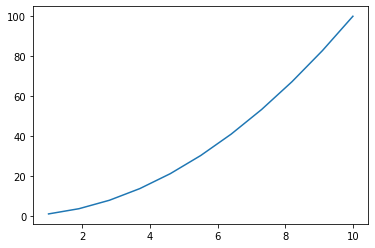

In [18]:
x = np.linspace(1, 10, 11)
y = x**2 

fig, ax = plt.subplots() 

ax.plot(x, y);

**NOT: Aynı anda birden fazla plot çizdireceksek; plot sayısı kadar axes'imiz tanımlı olmalı:**

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) 
# 2 plot için ax1 ve ax2 axeslerini tanımladık. 
# sharey parametresi ile y-eksenini ortak eksen yaptık.

ax1.plot(x, y)

ax1.set_title('Sharing Y axis')

ax2.scatter(x, y);

**veya ax'ları şu şekilde de tanımlayabiliriz.:**

In [ ]:
f, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(x, y) # axes'in 0. indeksi birinci axes'imiz
ax[1].scatter(x, y)  # axes'in 1. indeksi ikinci axes'imiz.

### PoliceKillingUS.csv dataseti üzerinde görselleştirme yapalım:

In [ ]:
# df0 = pd.read_csv('PoliceKillingsUS.csv', encoding="UTF-8") # error!

**Unicode decode error!!  ("utf-8' codec can't decode")**

**Bu csv dosyası UTF-8'e uygun kodlanmamış!**

Always take a note of your dataset, and choose encoding accordingly, or else you might not be able to properly decode dataset into a Pandas DataFrame. Few of the common options include "utf-8", "utf-16", "latin-1", "iso-8859-1", "iso-8859-15" & "cp1252". Also ensure to mention complete PATH to your dataset, if it isn't in the same local directory as your IDE (Jupyter Notebook, for instance). If unaware of the PATH, run %pwd in an Input cell of Jupyter Notebook to fetch that information. For more detailed know-how on Jupyter Notebook, please refer to the [article](https://medium.com/@neuralnets/beginners-quick-guide-for-handling-issues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b) focusing entirely on that subject.<br>

**Pandas read_csv() tricks you should know to speed up your data analysis**<br>
["SOURCE 1](https://towardsdatascience.com/all-the-pandas-read-csv-you-should-know-to-speed-up-your-data-analysis-1e16fe1039f3)<br>
["SOURCE 2](https://python.plainenglish.io/reading-data-with-pythons-pandas-2715ff925b1d)<br>
["SOURCE 3](https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/)<br>
["SOURCE 4](http://net-informations.com/ds/pda/csv.htm)<br>
["SOURCE 5](https://blog.finxter.com/how-to-fix-unicodedecodeerror-when-reading-csv-file-in-pandas-with-python/)<br>


**the most viable formats in which files tend to be encoded are mostly either of these:**
- encoding="utf8"
- encoding="utf16"
- encoding="windows-1251"
- encoding="windows-1252"
- encoding='latin1' (also known as ISO-885901)
- encoding='iso-8859-1' or 
- encoding='cp1252'

In [202]:
# Dosya windows-1252 encodinge uygun bir dataseti:

df0 = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

df=df0.copy()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### "race" sütunu üzerinde plotlama yaparak ırkları inceleyelim:

In [203]:
# Bir kategorik sütunu incelerken yapılacak ilk iş;
 # onun unique değerlerine bakmak.

df.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [204]:
df.shape

(2535, 14)

In [205]:
# null değerleri düşürelim:

df.dropna(inplace=True)
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [206]:
df.shape

(2254, 14)

In [207]:
df.race.isnull().sum()

0

In [208]:
# race feature'ımdaki kategorik değerler datasetinde ne sıklıkla geçiyor?

df.groupby("race").race.count()

race
A      36
B     592
H     401
N      29
O      28
W    1168
Name: race, dtype: int64

In [158]:
df.groupby("race").race.count().index

Index(['A', 'B', 'H', 'N', 'O', 'W'], dtype='object', name='race')

In [50]:
df.groupby("race").race.count().values

array([  39,  618,  423,   31,   28, 1201], dtype=int64)

In [51]:
# value'ları sıralamak için:

np.sort(df.groupby("race").race.count().values, axis=0)

array([  28,   31,   39,  423,  618, 1201], dtype=int64)

**Not: Bir kategorik feature'ın hem kategorilerini hem de bu kategorilerin frekanslarını öğrenmek için value_counts() metodunu kullanırım:**

In [52]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [54]:
df.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [ ]:
df.race.value_counts().values

**NOT: Kategorik bir feature'ın kategorilerini ve bunların frekanslarını görmek için barplot kullanırım.**

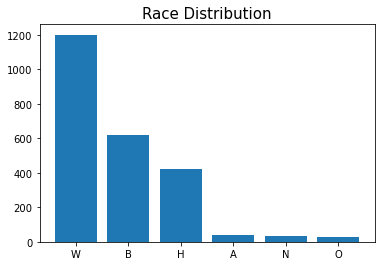

In [60]:
# object oriented yöntemde;
# plotlama yapmak üzere axes objecti üzerine metodlar uyguluyoruz.

fig, ax = plt.subplots()

ax.bar(df.race.value_counts().index, df.race.value_counts().values)

ax.set_title("Race Distribution", fontsize=15);

Text(0.5, 1.0, 'figure_title-Race Dist.')

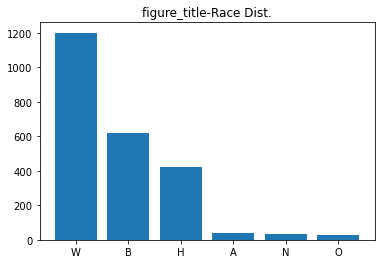

In [61]:
# figure üzerine de bir başlık verebiliyoruz:

fig, ax = plt.subplots()

ax.bar(df.race.value_counts().index, df.race.value_counts().values)

plt.title("figure_title-Race Dist.")

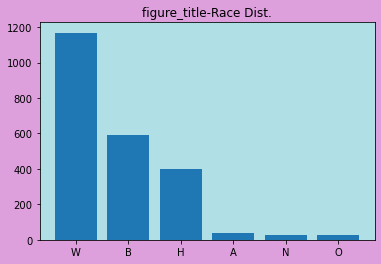

In [336]:
# figure ve axes'i renklendirelim:

fig, ax = plt.subplots()
ax.bar(df.race.value_counts().index, df.race.value_counts().values)
plt.title("figure_title-Race Dist.")

ax.set(facecolor = "powderblue")

fig.set_facecolor('plum');

## şimdi barların üzerine value'larını yazdıralım:

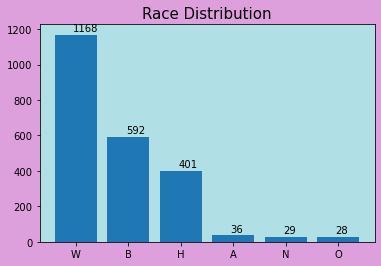

In [337]:
fig, ax = plt.subplots()
ax.bar(df.race.value_counts().index, df.race.value_counts().values)
ax.set_title("Race Distribution", fontsize=15);

for a in ax.patches:
    ax.annotate((a.get_height()), (a.get_x()+0.35, a.get_height()+20));
# annotate'in içine önce ilk parametre olarak text'i yazıyoruz. 
# 2. parametre ile bu text'in x ve y olarak yazdırılacağı konumu belirliyoruz.

ax.set(facecolor = "powderblue") 
fig.set_facecolor('plum');

In [62]:
ax.patches
# 6 kategoriye karşılık 6 tane patch var.

<Axes.ArtistList of 6 patches>

In [64]:
ax.patches[0]

In [68]:
ax.patches[0].get_x()

-0.4

In [67]:
ax.patches[0].get_height()

1201

In [70]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

## pandas ile plotlayalım:  

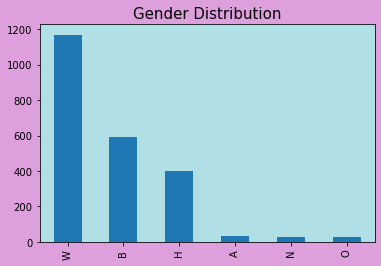

In [338]:
fig, ax = plt.subplots()

# DataFrame'e veya onun bir Serie'sine plot metodu uyguluyoruz.
df.race.value_counts().plot(kind='bar', ax=ax) 

ax.set_title("Gender Distribution", fontsize=15)

ax.set(facecolor = "powderblue") 
fig.set_facecolor('plum');

### Barların üzerine value'ları yazırmada bar_label() metodu: 

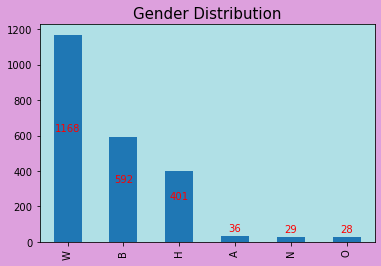

In [339]:
fig, ax = plt.subplots()
df.race.value_counts().plot(kind='bar', ax=ax)
ax.set_title("Gender Distribution", 
             fontsize=15)


ax.bar_label(ax.containers[0], color="red", 
             size=10, 
             label_type="center", 
            padding=10);

ax.set(facecolor = "powderblue") 
fig.set_facecolor('plum');

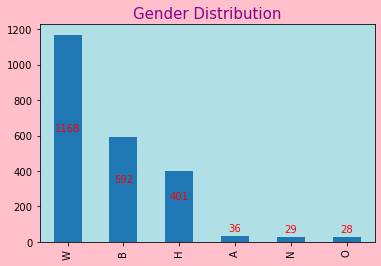

In [340]:
 # figure'ı oluştururken de renklendirebiliyoruz:
    
fig, ax = plt.subplots(facecolor="pink")

df.race.value_counts().plot(kind='bar', ax=ax)
ax.set(facecolor = "powderblue") 
ax.set_title("Gender Distribution", 
             fontsize=15, 
             color = "darkmagenta")
ax.bar_label(ax.containers[0], color="red", 
             size=10, 
             label_type="center",  # ya da "edge"
            padding=10);

### functional metodla plot: 

Text(0.5, 1.0, 'Gender Distribution')

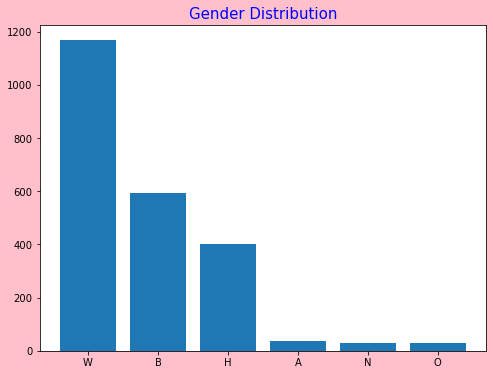

In [346]:
x = df.race.value_counts().index 
y = df.race.value_counts().values 

plt.figure(figsize=(8,6),facecolor="pink")
plt.bar(x, y)

plt.title("Gender Distribution", fontsize=15, c="blue")

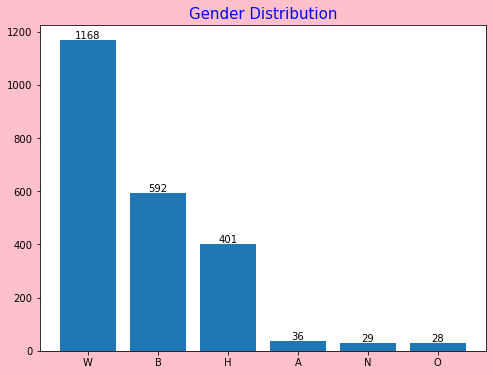

In [350]:
x = df.race.value_counts().index 
y = df.race.value_counts().values 
plt.figure(figsize=(8,6),facecolor="pink") 
plt.bar(x, y)
plt.title("Gender Distribution", fontsize=15, c="blue")

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )  # SHIFT TAB TAB !!

# "Diamonds" Dataset

In [147]:
#  print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df2 = sns.load_dataset("diamonds")
print(df2.info())
df2.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
53823,0.77,Ideal,I,VS1,60.9,57.0,2736,5.92,5.94,3.61
49426,0.70,Very Good,H,SI1,62.7,56.0,2107,5.60,5.62,3.52
42090,0.55,Ideal,E,SI2,62.0,56.0,1273,5.27,5.22,3.25
43326,0.50,Very Good,F,VS2,62.6,54.0,1404,5.10,5.13,3.20
46175,0.50,Premium,E,VS2,61.8,58.0,1746,5.11,5.05,3.14
29027,0.31,Ideal,H,VVS1,61.9,55.0,687,4.38,4.41,2.72
35605,0.31,Premium,H,VVS1,62.6,58.0,907,4.33,4.29,2.70
50270,0.64,Ideal,E,VS2,62.0,55.0,2238,5.52,5.55,3.43
5460,1.00,Fair,G,SI1,68.2,60.0,3833,6.02,5.94,4.08
12681,1.26,Ideal,J,VS2,63.2,57.0,5306,6.86,6.81,4.32


**info about dataset**
- **carat   :**Carat weight of the diamond
- **cut     :**A diamond cut is a style or design guide used when shaping a diamond for polishing.
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

In [211]:
df2.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

### En nadir rastlanan 3 kesim (cut) kategorisini görselleştirelim: 

In [212]:
df2.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [213]:
df2.cut.value_counts(ascending=True)

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

In [214]:
df2.cut.value_counts(ascending=True)[:3] 

Fair          1610
Good          4906
Very Good    12082
Name: cut, dtype: int64

In [215]:
least_common_cut = df2.cut.value_counts(ascending=True)[:3] 
least_common_cut

Fair          1610
Good          4906
Very Good    12082
Name: cut, dtype: int64

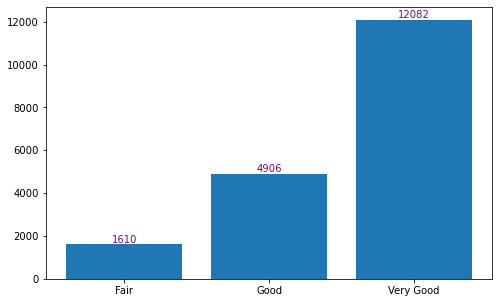

In [357]:
# matplotlib'i kullanarak plotlayalım:

fig, ax = plt.subplots(figsize=(8, 5)) 
# yatay ekseni girerken kategori sayısını gözönüne alıyorum.
# kategori sayım az ise x eksenini küçük tutarım. 

ax.bar(x = least_common_cut.index, height=least_common_cut.values)

ax.bar_label(ax.containers[0], 
             color="purple", 
             size=10);
# or:
# for p in ax.patches:
#     ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10))

In [ ]:
# least_common_cut'ın indeksleri otomatik olarak geldi.

# Fakat set_xticklabels() metodunu kullanarak da getirebiliriz.

fig, ax = plt.subplots(figsize=(8, 5)) 
ax.bar(x = least_common_cut.index, height=least_common_cut.values)

ax.set_xticklabels(least_common_cut.index, rotation=60)

ax.bar_label(ax.containers[0], 
             color="purple", 
             size=10);

### Pandas çözümü:

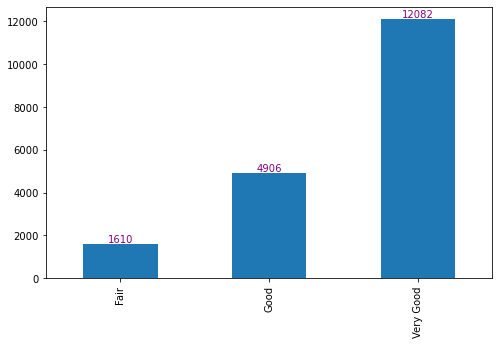

In [359]:
fig, ax = plt.subplots(figsize=(8, 5))

least_common_cut.plot(kind='bar', ax=ax) 

# ax.set_xticklabels(least_common_cut.index, rotation=45)

ax.bar_label(ax.containers[0], 
             color="purple", 
             size=10);
# or:
# for p in ax.patches:
#     ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10))

### Eğer veriyi oranlayarak mukayese etmek istersek:

In [217]:
df2.cut.value_counts(ascending=True, normalize=True)[:3] * 100 

Fair          2.984798
Good          9.095291
Very Good    22.398962
Name: cut, dtype: float64

**pie chart ile yüzde verilerini plotlayalım:**

**value_counts()'tan gelen indeksleri pie chart'ın labelları yapacağız.**

**value'larını ise "x" parametresine assign edeceğiz:**

In [220]:
kategoriler = df2.cut.value_counts(ascending=True)[:3].index
kategoriler

CategoricalIndex(['Fair', 'Good', 'Very Good'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category')

In [221]:
values = df2.cut.value_counts(ascending=True, normalize=True)[:3] * 100 
values

Fair          2.984798
Good          9.095291
Very Good    22.398962
Name: cut, dtype: float64

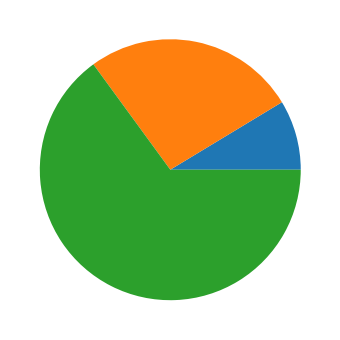

In [222]:
fig, ax = plt.subplots(figsize = (12,6))
ax.pie(x = values);

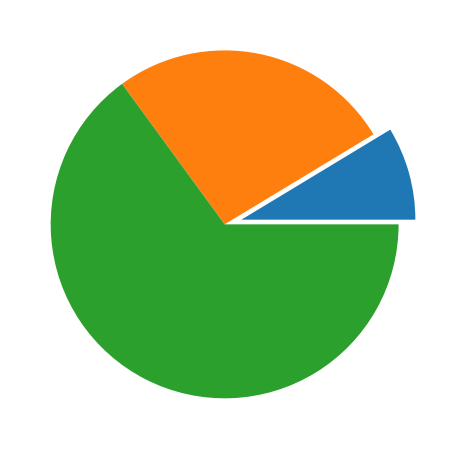

In [235]:
explode = (0.1, 0, 0)
# toplam 3 değer var. 3 explode değeri girmemiz gerekir.
# ki içlerinden hangi sıradakini explode edeceğini bilsin!

fig, ax = plt.subplots(figsize = (12,8))
ax.pie(x = values, explode=explode);

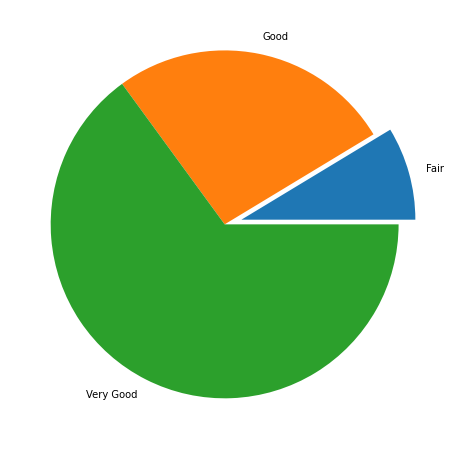

In [236]:
explode = (0.1, 0, 0) 
fig, ax = plt.subplots(figsize = (12,8))
ax.pie(x = values, explode=explode,
       labels=kategoriler); 

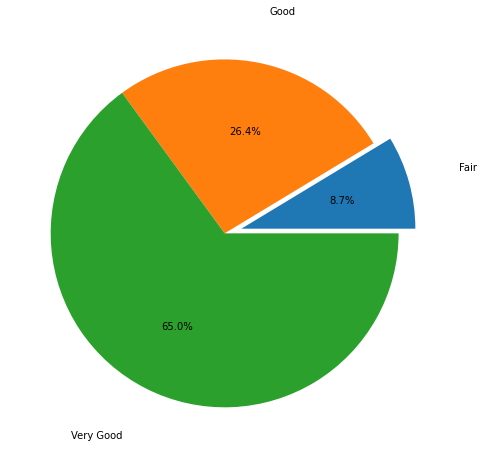

In [242]:
explode = (0.1, 0, 0) 
fig, ax = plt.subplots(figsize = (12,8))
ax.pie(x = values, explode=explode,
       labels=kategoriler, 
       labeldistance=1.3,
       autopct='%.1f%%'); 

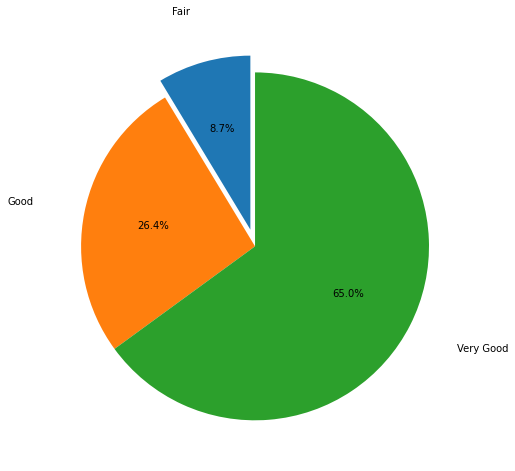

In [243]:
explode = (0.1, 0, 0) 
fig, ax = plt.subplots(figsize = (12,8))
ax.pie(x = values, explode=explode,
       labels=kategoriler, 
       labeldistance=1.3,
       autopct='%.1f%%',
       # textprops={'color':"indigo"}
       startangle=90);

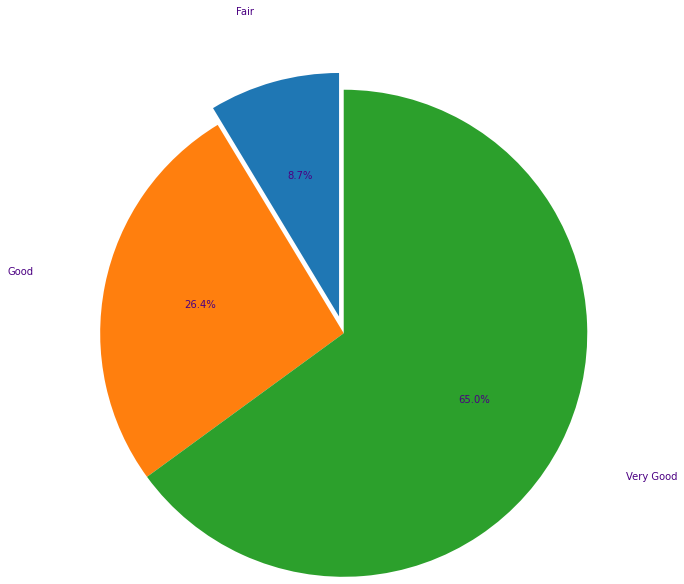

In [261]:
explode = (0.1, 0, 0) 
fig, ax = plt.subplots(figsize = (12,8))
ax.pie(x = values, explode=explode,
       labels=kategoriler, 
       labeldistance=1.3,
       autopct='%.1f%%',
       startangle=90,
       textprops={'color':"indigo"},
       
       radius=1.4); 

## "price" sütununu 3 sınıfa kategorize ederek görselleştirme yapalım.

In [6]:
df2.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
49794,0.53,Ideal,E,VS2,61.8,55.0,2163,5.21,5.24,3.23
11645,1.14,Very Good,H,VS2,59.9,57.0,5053,6.78,6.81,4.07
12932,1.02,Very Good,H,VS2,62.4,57.0,5383,6.43,6.35,3.99
46596,0.54,Ideal,F,VS2,62.2,57.0,1786,5.24,5.21,3.25
13280,1.12,Fair,G,VS1,64.8,56.0,5487,6.48,6.52,4.21
10123,1.01,Good,D,SI2,63.6,57.0,4719,6.35,6.39,4.05
50035,0.71,Very Good,F,SI1,63.2,56.0,2198,5.66,5.61,3.56
17155,1.09,Ideal,E,SI1,61.8,55.0,6849,6.65,6.58,4.09
44145,0.50,Premium,E,SI1,61.0,61.0,1562,5.11,5.09,3.11
28264,0.23,Good,F,VS2,63.8,57.0,357,3.93,3.84,2.48


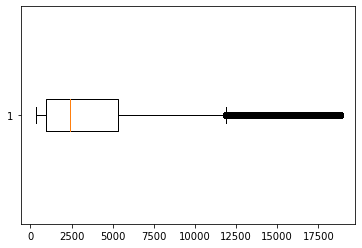

In [312]:
# matplotlib ile:

plt.boxplot(df2.price, vert=False);  # vert=False !

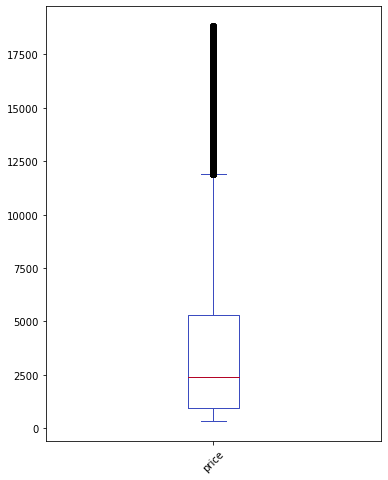

In [310]:
# pandas ile:

fig, ax = plt.subplots()
ax = df2.price.plot(kind = "box",
               colormap = "coolwarm",            
               figsize = (6, 8), rot=45);

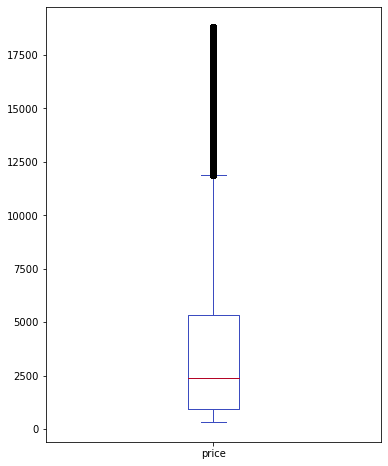

In [305]:
# Tek bir plotlama yapacağımızdan subplots() ile axes tanımlamaya gerek yok.

df2.price.plot(kind = "box",
               colormap = "coolwarm",            
               figsize = (6, 8));

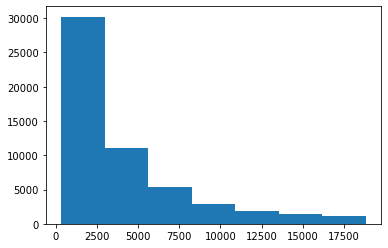

In [276]:
plt.hist(df2.price, bins=7);

In [324]:
# veriyi nerelerden 3'e böleceğimi belirlemek için: 

df2.price.quantile([0, 0.25,0.5, 0.75, 1])

0.00      326.00
0.25      950.00
0.50     2401.00
0.75     5324.25
1.00    18823.00
Name: price, dtype: float64

In [325]:
df2["price_cat"] = df2.price.apply(lambda x : "high" if x >=5324 else ("medium" if x >950 and x <= 5324 else "low"))

In [326]:
df2.price_cat.value_counts()

medium    26960
low       13490
high      13490
Name: price_cat, dtype: int64

In [327]:
price_class = df2.price_cat.value_counts()
price_class

medium    26960
low       13490
high      13490
Name: price_cat, dtype: int64

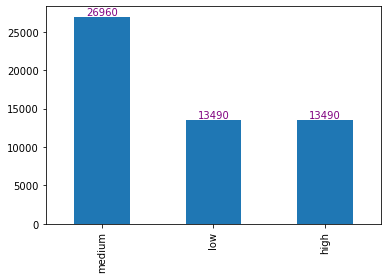

In [330]:
# Pandas ile:

ax = price_class.plot.bar()

ax.bar_label(ax.containers[0], color="purple", 
             size=10);

# or:
# for p in ax.patches:
#     ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

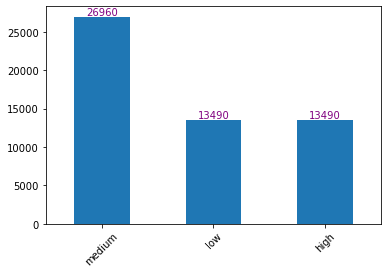

In [334]:
ax = price_class.plot.bar()

ax.set_xticklabels(price_class.index, 
                   rotation = 45)

ax.bar_label(ax.containers[0], color="purple", 
             size=10);

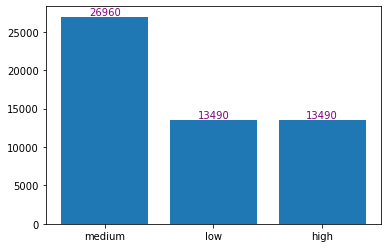

In [335]:
# Matplotlib ile:

fig, ax = plt.subplots()
ax.bar(x = price_class.index, height=price_class.values)

ax.bar_label(ax.containers[0], color="purple", 
             size=10);

# or:
# for p in ax.patches:
#     ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">İYİ ÇALIŞMALAR</p>